# トレンド突破戦略のデモ

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import mplfinance as mpf
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates

## 株価データの獲得

In [2]:
# yahooサイトからデータをダウンロード
ticker = '8035.T'
end_date = datetime.today()
# 分析に用いるデータ期間を指定する
start_date = end_date - timedelta(days=90)
yf.pdr_override()
data = pdr.get_data_yahoo(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


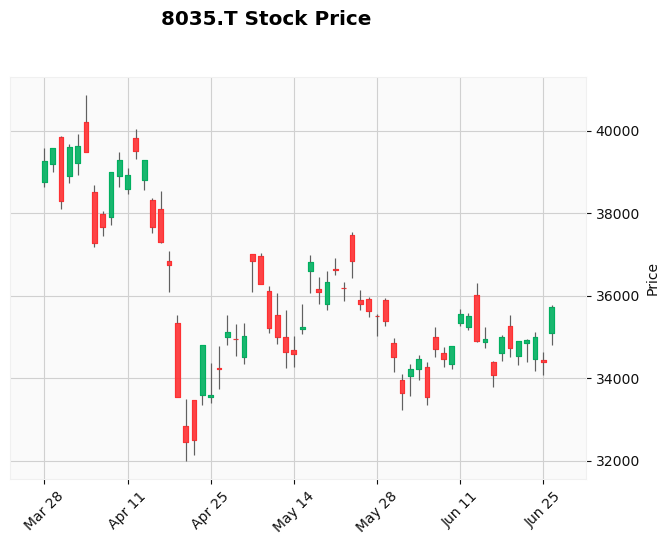

In [3]:
mpf.plot(data, type="candle", style="yahoo", title=ticker+" Stock Price")

In [4]:
def draw_trendlines(data):
    highs = np.array(data["High"])
    lows = np.array(data["Low"])

    # Find local maximum and minimum values
    high_indices = np.where((highs[1:-1] > highs[:-2]) & (highs[1:-1] > highs[2:]))[0] + 1
    low_indices = np.where((lows[1:-1] < lows[:-2]) & (lows[1:-1] < lows[2:]))[0] + 1

    # Plot trendlines
    plt.plot(data.index, highs, color="blue", label="Highs")
    plt.plot(data.index, lows, color="red", label="Lows")
    plt.scatter(data.index[high_indices], highs[high_indices], color="green", label="High Points")
    plt.scatter(data.index[low_indices], lows[low_indices], color="orange", label="Low Points")

    plt.legend()
    plt.title("Trendlines")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

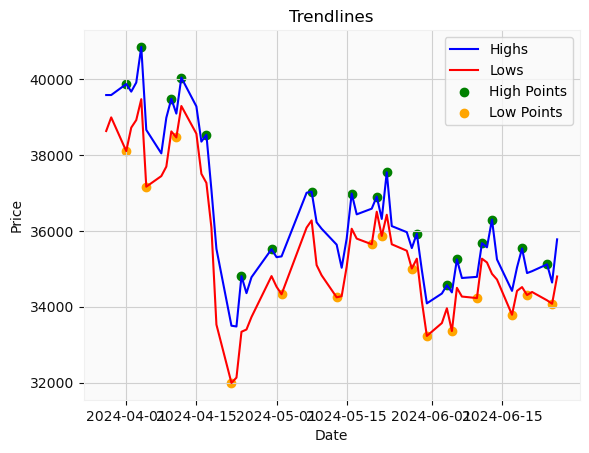

In [5]:
draw_trendlines(data)

In [6]:
def identify_breakouts(data, uptrend_line, downtrend_line):
    highs = np.array(data["High"])
    lows = np.array(data["Low"])

    # Identify uptrend breakouts
    uptrend_breakouts = np.where(highs > uptrend_line)[0]

    # Identify downtrend breakouts
    downtrend_breakouts = np.where(lows < downtrend_line)[0]

    return uptrend_breakouts, downtrend_breakouts

In [7]:
x_values = mdates.date2num(data.index)
uptrend_line = np.polyval([0.01, 100], x_values)
downtrend_line = np.polyval([-0.01, 400], x_values)

uptrend_breakouts, downtrend_breakouts = identify_breakouts(data, uptrend_line, downtrend_line)

In [8]:
def draw_trendlines_with_breakouts(data, uptrend_line, downtrend_line, uptrend_breakouts, downtrend_breakouts):
    highs = np.array(data["High"])
    lows = np.array(data["Low"])

    # Find local maximum and minimum values
    high_indices = np.where((highs[1:-1] > highs[:-2]) & (highs[1:-1] > highs[2:]))[0] + 1
    low_indices = np.where((lows[1:-1] < lows[:-2]) & (lows[1:-1] < lows[2:]))[0] + 1

    # Plot trendlines
    plt.plot(data.index, highs, color="blue", label="Highs")
    plt.plot(data.index, lows, color="red", label="Lows")
    plt.scatter(data.index[high_indices], highs[high_indices], color="green", label="High Points")
    plt.scatter(data.index[low_indices], lows[low_indices], color="orange", label="Low Points")

    # Plot trendline breakouts
    plt.plot(data.index[uptrend_breakouts], highs[uptrend_breakouts], "g^", label="Uptrend Breakouts")
    plt.plot(data.index[downtrend_breakouts], lows[downtrend_breakouts], "rv", label="Downtrend Breakouts")

    plt.legend()
    plt.title("Trendlines with Breakouts")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

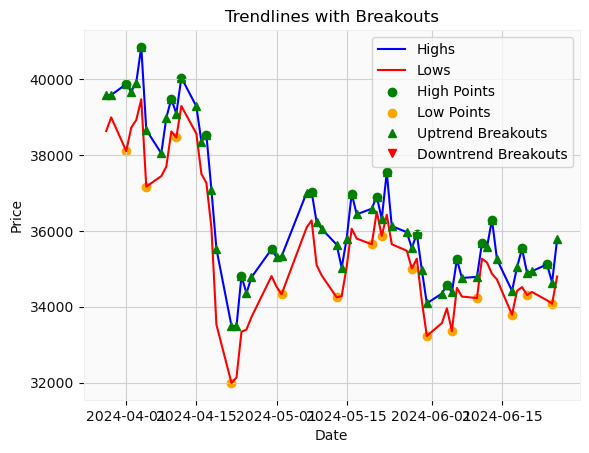

In [9]:
draw_trendlines_with_breakouts(data, uptrend_line, downtrend_line, uptrend_breakouts, downtrend_breakouts)

In [10]:
class Backtester:
    def __init__(self, data, uptrend_breakouts, downtrend_breakouts):
        self.data = data
        self.uptrend_breakouts = uptrend_breakouts
        self.downtrend_breakouts = downtrend_breakouts
        self.positions = np.array([])

    def backtest(self):
        for i in range(len(self.data)):
            if i in self.uptrend_breakouts:
                self.positions = np.append(self.positions, "Buy")
            elif i in self.downtrend_breakouts:
                self.positions = np.append(self.positions, "Sell")
            else:
                self.positions = np.append(self.positions, "Hold")

    def plot_backtest_results(self):
        plt.plot(self.data.index, self.data["Close"], color="blue", label="Close Price")
        plt.scatter(self.data.index[self.positions == "Buy"], self.data["Close"][self.positions == "Buy"],
                    color="green", label="Buy")
        plt.scatter(self.data.index[self.positions == "Sell"], self.data["Close"][self.positions == "Sell"],
                    color="red", label="Sell")

        plt.legend()
        plt.title("Backtest Results")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

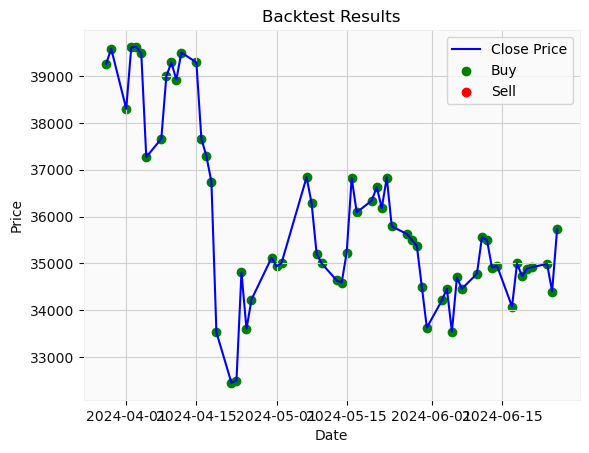

In [11]:
backtester = Backtester(data, uptrend_breakouts, downtrend_breakouts)
backtester.backtest()
backtester.plot_backtest_results()